In [2]:
pip install requests beautifulsoup4 pandas matplotlib

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to get the table of winners from a given year
def get_winners(year):
    url = f"https://cvg.nikkan.co.jp/tokyo_backnumber/{year}"
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table with section_id="taikai_result"
    table = soup.find('section', id='taikai_result')
    if table is None:
        return None  # No table found for this year

    # Parse the table
    data = []
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if len(cols) > 1:
            data.append(cols)

    return data

# Collect data from 2004 to 2023
all_data = []
years = range(2004, 2023 + 1)
for year in years:
    if year == 2019:
        continue  # Skip 2019 as it has a different structure
    winners = get_winners(year)
    if winners:
        for winner in winners:
            all_data.append([year] + winner)




In [19]:
import csv
import os

def extract_service_names(data):
    service_names = set()
    for row in data:
        if len(row) == 3:
            service_names.add(row[2])
        elif len(row) == 5:
            service_names.add(row[5])
    service_names.remove('プラン名')
    return list(service_names)

# Extract the service names
data = extract_service_names(all_data)


In [27]:
data


['ネット家電の遠隔操作を統合するWEBサイトの開発',
 'WEBサイトを活用した情報集約型プラットフォームの提供による日中環境ビジネスの推進事業',
 '超近代型低コストハウスとマイクロバブル栽培装置のレンタル販売',
 'ロコトレ支援ロボットTocco',
 '年々是木育\r\n\u3000-木・子ども・地域を育てる-',
 '携帯電話を利用した単語帳',
 'サカスタ\u3000\r\n少年が選手になる過程をアシストし、\r\nゴールに導く',
 'オンラインカットサービス Wigmeet',
 '人間計測技術を用いたロボット評価サービスWevidence',
 'モノづくり応援ソーシャルプラットフォーム事業',
 '水産業の持続可能性と地方創生～水産物のブランディング戦略～',
 'ポチャリ\u3000\r\n～天才発掘プロジェクト～',
 '農業支援プラットフォーム\r\n「SAgri」',
 '高齢化が懸念される旧式大型団地の地域丸ごと見守りステーション化',
 'UBER型ベビーシッターで\r\nこども虐待をゼロに！',
 '海外へ日本のオタクマンガを発信！',
 '認知症予防スクリーニングテスト・運動プログラム提供',
 '「対話」と「共創」を通したオリジナル絵本プロデュース事業\u3000-共創デザイン絵本制作ラボ-',
 'トレーニング共有プラットフォーム「シェアトレ」',
 '高齢者から子供へ伝える体験型教育事業',
 '訪日観光客向け宿坊参籠専用宿泊予約サイト',
 '小型パワーリハビリマシンによる健康ビジネス',
 '3次元CAD学習システム',
 '日本中が駐輪場に。駐輪場賃借仲介サービス「Chari Stop」',
 'Swampdog-動物福祉を叶える獣医解剖学 MR教材-',
 '留学生と海外旅行客のコラボレーション！魅せる日本！',
 '北海道ニセコでの国内留学と旅行の融合',
 'イヌトレ\r\n～ドッグトレーナーと飼い主を繋ぐ、\r\n\u3000\u3000\u3000\u3000\u3000\u3000犬のしつけプラットフォーム～',
 'Diversity Café\r\n\xa0〜難民が活躍できる社会の実現〜',
 'トイシェアリング｢Around\u3000Baby」',
 '予防医療を推進するインターネットメディ

In [ ]:
# 必要なライブラリをインストール
!pip install numpy nltk scikit-learn matplotlib seaborn

import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# nltkデータのダウンロード
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install janome
from janome.tokenizer import Tokenizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['におけるの'] not in stop_words.
  warnings.warn(


Topic #0:
開発 学習 ペット 健康 高齢 装置 訓練
Topic #1:
ロボット 大学生 促進 アプリ 評価 次世代 プラットフォーム
Topic #2:
サイト オンライン 絵本 画像 予約 歯科 ブランディング
Topic #3:
プラットフォーム 情報 web 地域 教育 留学 仲介
Topic #4:
支援 新しい 技術 学生 ロボット 海外 日本
Topic #5:
携帯 電話 利用 管理 開発 作る 情報
Topic #6:
製造 生産 伝統 障害 自由 産業 活性
Topic #7:
利用 農業 広告 マイクロ 管理 バイオ タグ
Topic #8:
社会 予防 医療 創出 サイト 提供 できる
Topic #9:
観光 問題 みんな デザイン 空間 小型 環境



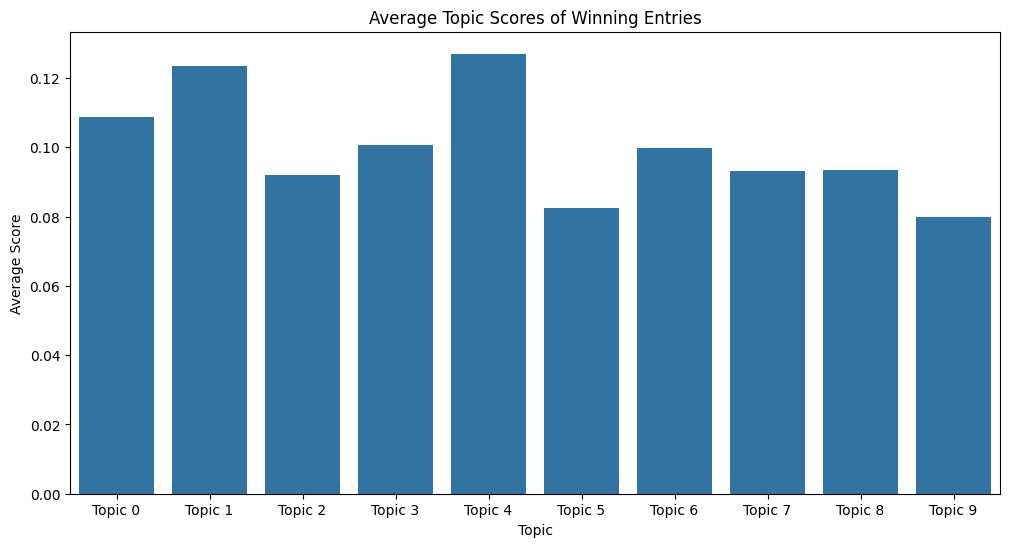

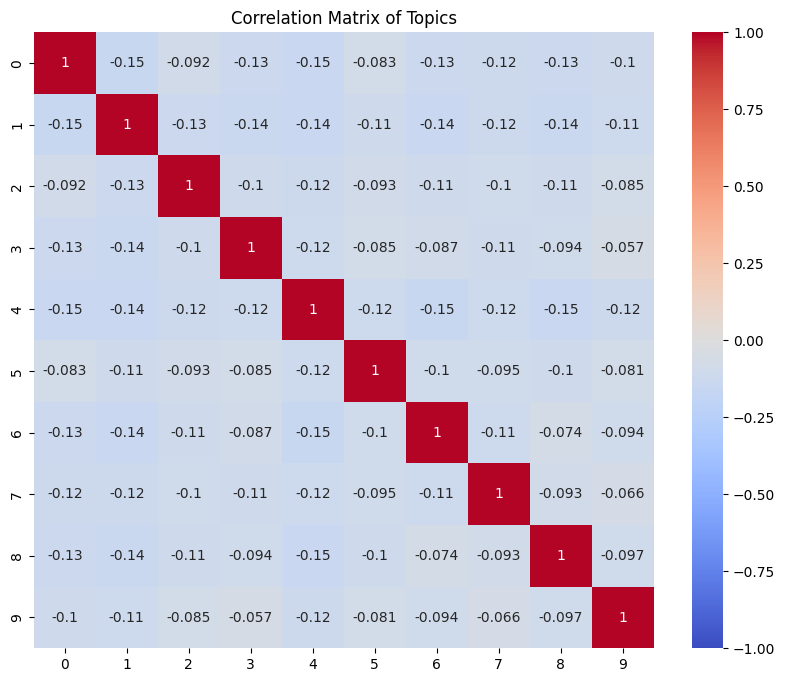

In [52]:
# NGワードの設定
ng_words = {'project', '販売', 'com', 'baby', 'サービス', '企業',
            'システム', '事業', 'プロジェクト', 'ビジネス', '向け',
            '使う', '用いる', 'モノ', '活用', 'みんな'}

# 日本語のストップワードを設定
stop_words_set = ng_words.union({'から', 'における', 'による', 'ため',
                                 'の', 'に', 'を', 'で', 'と', 'できる',
                                 'は', 'が', 'て', 'い', 'な', 'も', 'する',
                                 'ない', 'ある'})

# ストップワードセットをリストに変換
stop_words_list = list(stop_words_set)

# 前処理
def preprocess_text(text):
    # 小文字化（日本語には影響しないが一応統一のため）
    text = text.lower()
    # トークン化
    t = Tokenizer()
    words = [token.base_form for token in t.tokenize(text) if token.base_form not in stop_words_list and token.surface not in stop_words_list]
    return ' '.join(words)

# 各作品の説明を前処理
processed_descriptions = [preprocess_text(description) for description in data]

# 特徴抽出
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=stop_words_list)
X = vectorizer.fit_transform(processed_descriptions)

# LDAによるトピックモデルの生成
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# トピックごとのキーワードを表示
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print_top_words(lda, vectorizer.get_feature_names_out(), 7)

# 各作品のトピック分布を取得
topic_distribution = lda.transform(X)

# トピック分布をリストに変換
topic_list = topic_distribution.tolist()

# 統計分析
# トピックごとの平均スコアをプロット
topic_means = np.mean(topic_distribution, axis=0)
plt.figure(figsize=(12, 6))
sns.barplot(x=[f'Topic {i}' for i in range(len(topic_means))], y=topic_means)
plt.xlabel('Topic')
plt.ylabel('Average Score')
plt.title('Average Topic Scores of Winning Entries')
plt.show()

# トピックごとの特徴を分析
correlation_matrix = np.corrcoef(topic_distribution.T)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Topics')
plt.show()


In [53]:
from PIL import Image

# ワードクラウドを生成して表示
def plot_word_cloud(lda, feature_names, n_top_words):
    font_path = './NotoSansJP-VariableFont_wght.ttf'  # 日本語フォントのパスを指定
    images = []

    for topic_idx, topic in enumerate(lda.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', font_path=font_path).generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic #{topic_idx}')

        # 画像として保存
        image_path = f'wordcloud_topic_{topic_idx}.png'
        plt.savefig(image_path)
        plt.close()

        # 画像を読み込んでリストに追加
        images.append(Image.open(image_path))

    # 画像を連結
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    combined_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        combined_image.paste(im, (x_offset, 0))
        x_offset += im.width

    combined_image.save('combined_wordcloud.png')
    print("Combined word cloud saved as 'combined_wordcloud.png'")

plot_word_cloud(lda, vectorizer.get_feature_names_out(), 10)

Combined word cloud saved as 'combined_wordcloud.png'
